In [17]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [18]:
dat = np.array(
    [
        11,
        10,
        12,
        14,
        12,
        15,
        14,
        13,
        15,
        102,
        12,
        14,
        17,
        19,
        107,
        10,
        13,
        12,
        14,
        12,
        108,
        12,
        11,
        14,
        13,
        15,
        10,
        15,
        12,
        10,
        14,
        13,
        15,
        10,
    ]
)
dat

array([ 11,  10,  12,  14,  12,  15,  14,  13,  15, 102,  12,  14,  17,
        19, 107,  10,  13,  12,  14,  12, 108,  12,  11,  14,  13,  15,
        10,  15,  12,  10,  14,  13,  15,  10])

In [19]:
df = pd.DataFrame(dat, columns=["Value"])
df["Index"] = df.index

In [20]:
df["Value"].describe().round(3)

count     34.000
mean      21.176
std       26.769
min       10.000
25%       12.000
50%       13.000
75%       15.000
max      108.000
Name: Value, dtype: float64

#### **Using Percentile**


In [21]:
l_threshold, u_threshold = df["Value"].quantile([0.05, 0.95]).round()
print(f"Upper:{u_threshold}\nLower: {l_threshold}")

Upper:104.0
Lower: 10.0


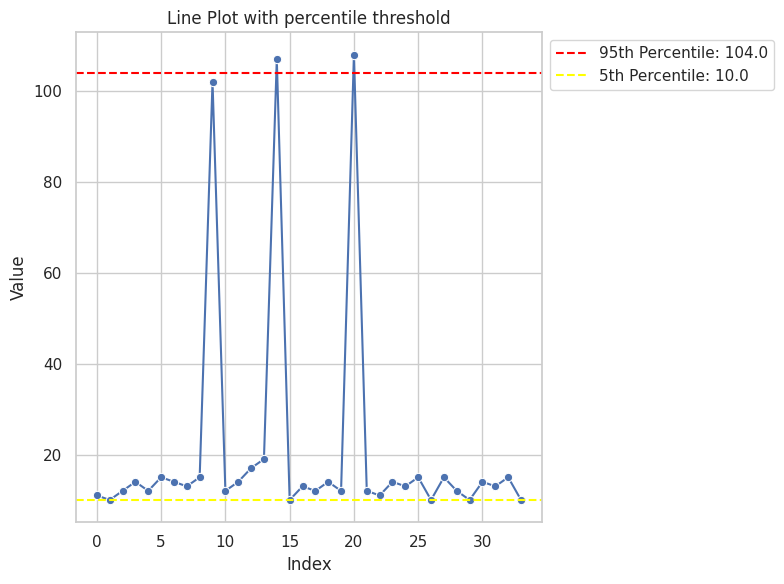

In [22]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(x="Index", y="Value", data=df, marker="o")

plt.axhline(
    y=u_threshold, color="red", linestyle="--", label=f"95th Percentile: {u_threshold}"
)

plt.axhline(
    y=l_threshold,
    color="yellow",
    linestyle="--",
    label=f"5th Percentile: {l_threshold}",
)
plt.title("Line Plot with percentile threshold")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout(rect=(0, 0, 0.8, 1))  # Increase the right margin
plt.show()

In [23]:
df[df["Value"] > u_threshold]["Value"].count()

np.int64(2)

In [24]:
df[df["Value"] < l_threshold]["Value"].count()

np.int64(0)

In [25]:
df_1 = df[(df["Value"] >= l_threshold) & (df["Value"] <= u_threshold)]

In [26]:
df_1.describe().round(3)

,Value,Index
count,32.000,32.000
mean,15.781,16.469
std,15.874,10.245
min,10.000,0.000
25%,12.000,7.750
50%,13.000,16.500
75%,14.250,25.250
max,102.000,33.000


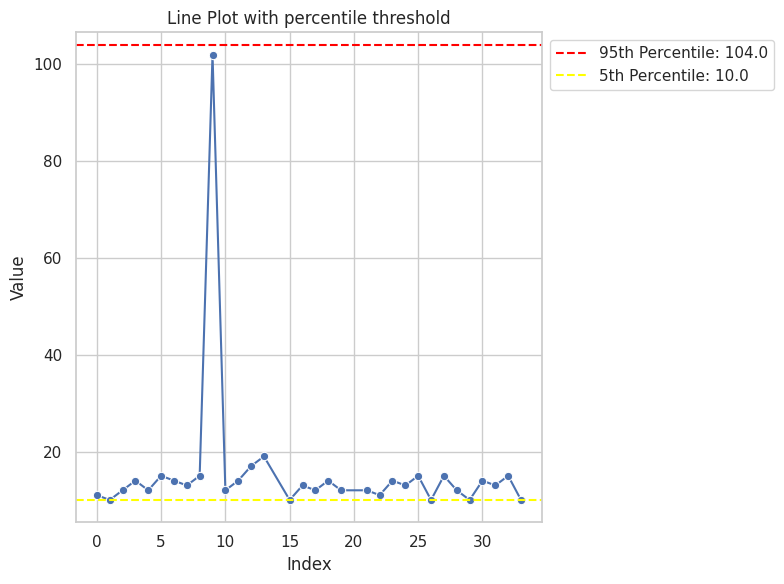

In [27]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(x="Index", y="Value", data=df_1, marker="o")

plt.axhline(
    y=u_threshold, color="red", linestyle="--", label=f"95th Percentile: {u_threshold}"
)

plt.axhline(
    y=l_threshold,
    color="yellow",
    linestyle="--",
    label=f"5th Percentile: {l_threshold}",
)
plt.title("Line Plot with percentile threshold")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout(rect=(0, 0, 0.8, 1))  # Increase the right margin
plt.show()

#### **Z-Score & Standard Deviation**


In [28]:
lower = df["Value"].mean() - 3 * df["Value"].std()
upper = df["Value"].mean() + 3 * df["Value"].std()
print(f"Upper:{upper}\nLower: {lower}")

Upper:101.4831687858394
Lower: -59.130227609368816


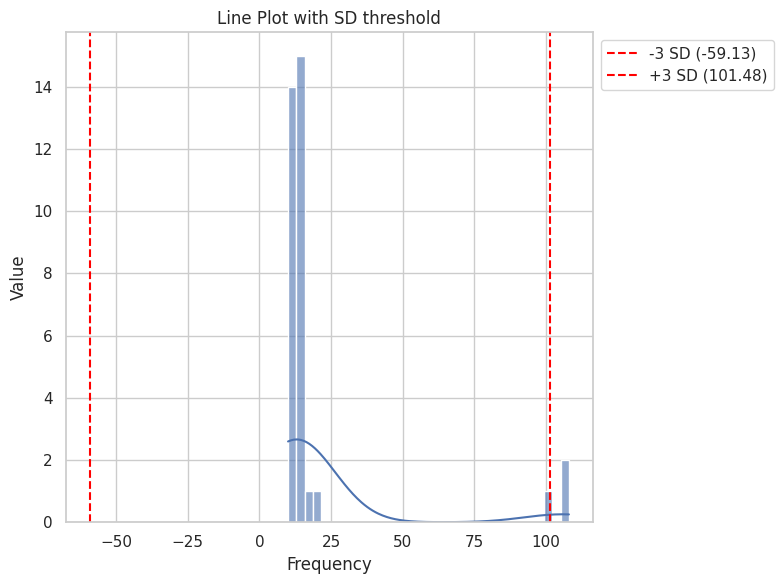

In [32]:
plt.figure(figsize=(10, 6))

sns.set_theme(style="whitegrid")
sns.histplot(x=df["Value"], kde=True, bins=34, multiple="stack", alpha=0.6)
plt.axvline(x=lower, color="red", linestyle="--", label=f"-3 SD ({lower:.2f})")
plt.axvline(x=upper, color="red", linestyle="--", label=f"+3 SD ({upper:.2f})")

plt.title("Line Plot with SD threshold")
plt.xlabel("Frequency")
plt.ylabel("Value")

# Add legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=(0, 0, 0.8, 1))  # Increase the right margin

# Show plot
plt.show()

In [33]:
df[df["Value"] > upper]["Value"].count()

np.int64(3)

In [34]:
df[df["Value"] < lower]["Value"].count()

np.int64(0)

#### **IQR**


<Axes: xlabel='Value'>

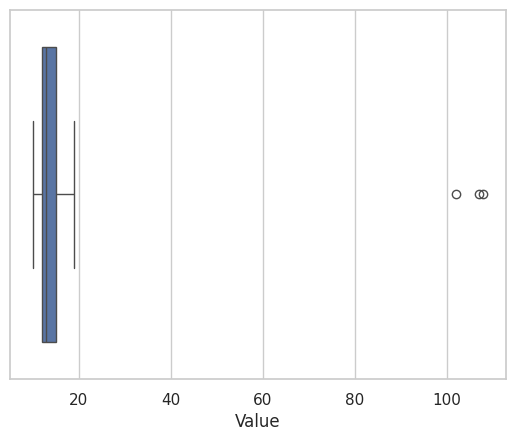

In [36]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df["Value"])

In [41]:
q1 = df["Value"].quantile(0.25)
q3 = df["Value"].quantile(0.75)

iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

print(f"Upper: {upper_limit}\nLower: {lower_limit}")

Upper: 19.5
Lower: 7.5


In [42]:
df[df["Value"] > upper_limit]["Value"].count()

np.int64(3)

In [44]:
df[df["Value"] < lower_limit]["Value"].count()

np.int64(0)